In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import push_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

tennis_atp_path = r'C:\Users\mrice\OneDrive\Projects\Github\Portfolio\TennisData\tennis_atp'

In [2]:
# Initialize an empty DataFrame to hold the concatenated data
all_matches_df = pd.DataFrame()

# Define a batch size for loading
batch_size = 5

# Create batches of years for incremental loading
years = list(range(1987, 2024))  # Starting from 1987 to 2023
year_batches = [years[i:i + batch_size] for i in range(0, len(years), batch_size)]

# Loop through each batch and load the corresponding files
for batch in year_batches:
    batch_df = pd.DataFrame()
    for year in batch:
        file_path = os.path.join(tennis_atp_path, f"atp_matches_{year}.csv")
        if os.path.exists(file_path):
            year_df = pd.read_csv(file_path)
            batch_df = pd.concat([batch_df, year_df], ignore_index=True)
    # Combine the batch DataFrame with the overall DataFrame
    all_matches_df = pd.concat([all_matches_df, batch_df], ignore_index=True)

# Show the shape and first few rows of the combined DataFrame
all_matches_df_shape = all_matches_df.shape
all_matches_df_head = all_matches_df.head()

all_matches_df_shape, all_matches_df_head


((119225, 49),
   tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
 0   1987-201      Guaruja    Hard         32             A      19870126   
 1   1987-201      Guaruja    Hard         32             A      19870126   
 2   1987-201      Guaruja    Hard         32             A      19870126   
 3   1987-201      Guaruja    Hard         32             A      19870126   
 4   1987-201      Guaruja    Hard         32             A      19870126   
 
    match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
 0          1     100652          1.0          NaN  ...     NaN      NaN   
 1          2     100770          NaN          NaN  ...     NaN      NaN   
 2          3     101131          NaN          NaN  ...     NaN      NaN   
 3          4     100518          NaN          NaN  ...     NaN      NaN   
 4          5     100595          NaN          NaN  ...     NaN      NaN   
 
    l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_

In [3]:
# Fill all NaN values with 0
cleaned_df = all_matches_df.fillna(0)

# Verify that all missing values have been filled
missing_values_after_cleaning = cleaned_df.isna().sum().sum()
missing_values_after_cleaning


0

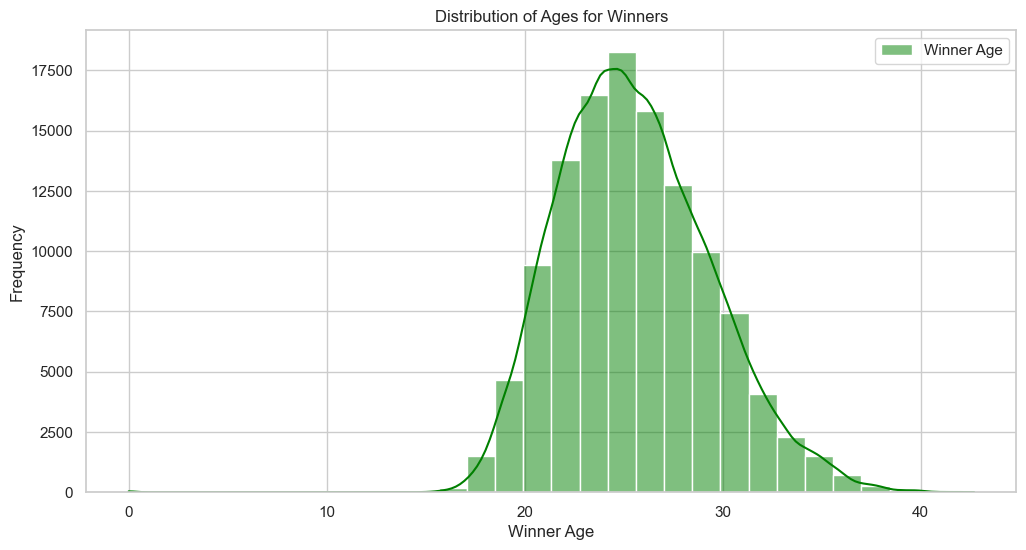

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,119225.000000,1.192250e+05,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,...,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000,119225.000000
mean,53.463804,2.003709e+07,67.001501,106040.875991,2.763707,181.014485,25.558458,106159.202281,1.803355,176.306773,...,38.106765,25.321493,11.873147,9.675211,3.814057,6.925653,81.311747,1247.912787,118.124219,772.846567
std,38.372491,1.050441e+05,107.470613,14939.778753,5.107738,29.074317,3.823525,15120.190763,4.579843,39.639687,...,26.052410,18.267818,8.842082,6.171208,3.509860,5.109951,133.167528,1693.497402,175.309941,973.201885
min,2.000000,1.986123e+07,1.000000,100273.000000,0.000000,0.000000,0.000000,100221.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.994111e+07,10.000000,101761.000000,0.000000,180.000000,22.800000,101767.000000,0.000000,180.000000,...,24.000000,14.000000,5.000000,7.000000,1.000000,3.000000,18.000000,383.000000,35.000000,240.000000
50%,32.000000,2.003062e+07,24.000000,103176.000000,0.000000,185.000000,25.200000,103176.000000,0.000000,185.000000,...,39.000000,25.000000,12.000000,10.000000,3.000000,7.000000,47.000000,770.000000,71.000000,570.000000
75%,64.000000,2.012123e+07,59.000000,104678.000000,4.000000,190.000000,28.000000,104731.000000,0.000000,188.000000,...,54.000000,37.000000,17.000000,14.000000,6.000000,10.000000,91.000000,1425.000000,122.000000,950.000000
max,128.000000,2.023083e+07,1701.000000,211468.000000,35.000000,211.000000,42.700000,212041.000000,35.000000,211.000000,...,328.000000,284.000000,101.000000,91.000000,28.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000


In [4]:
# Set the style for the visualizations
sns.set(style="whitegrid")

# Explore basic statistics of the numerical columns
basic_stats = cleaned_df.describe()

# Plotting the distribution of ages for winners
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df, x='winner_age', bins=30, color='green', label='Winner Age', kde=True)
plt.title('Distribution of Ages for Winners')
plt.xlabel('Winner Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

basic_stats


C:\Users\mrice\AppData\Local\Temp\ipykernel_22236\1397519368.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


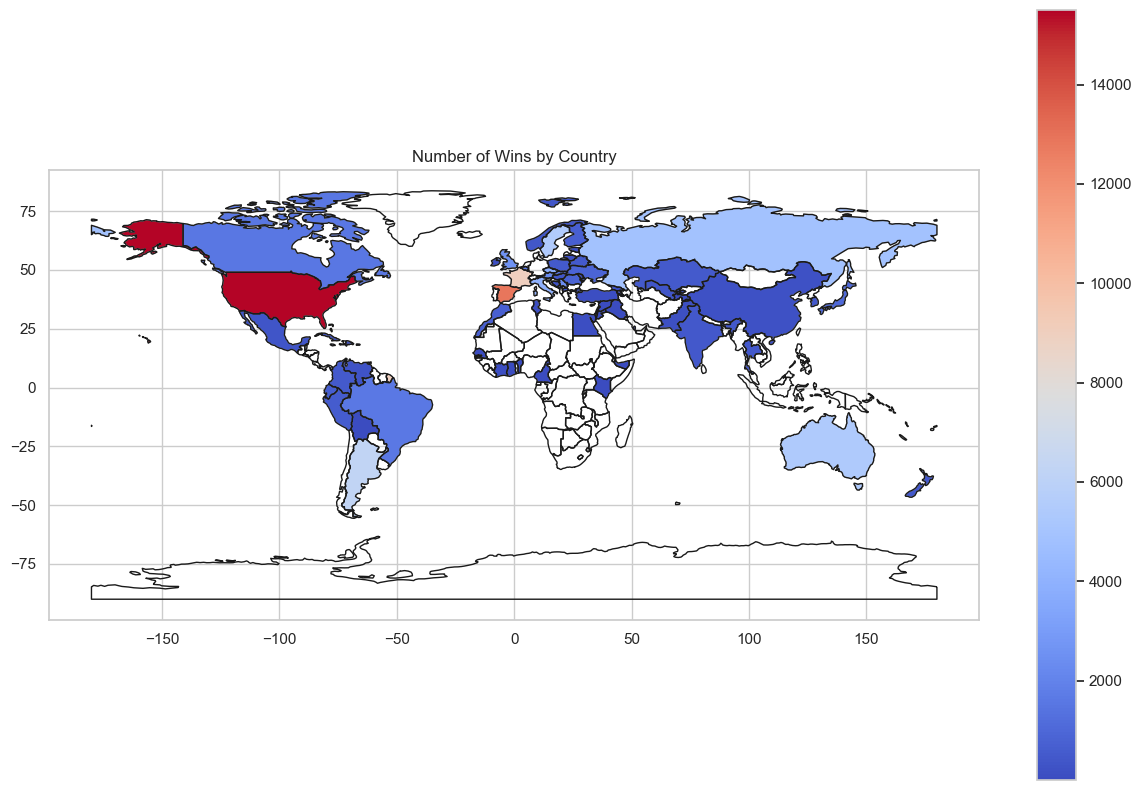

In [5]:
# How many unique countries we have in the 'winner_ioc' (IOC country codes) column
unique_countries = cleaned_df['winner_ioc'].unique()

# Count the number of wins by country
wins_by_country = cleaned_df['winner_ioc'].value_counts().reset_index()
wins_by_country.columns = ['winner_ioc', 'wins']

# Load the geometries of countries for mapping
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the geometries dataframe with our wins_by_country dataframe
merged = world.set_index('iso_a3').join(wins_by_country.set_index('winner_ioc'))

# Plotting
fig, ax = plt.subplots(1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='k')
merged.plot(column='wins', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Wins by Country')
plt.show()


In [6]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import push_notebook

# Prepare the data for Bokeh
source = ColumnDataSource(data={
    'age': cleaned_df['winner_age'],
    'rank': cleaned_df['winner_rank'],
})

# Initialize the plot
p = figure(
    width=600, height=400,
    x_axis_label='Winner Age', y_axis_label='Winner Rank',
    title='Relationship between Winner Age and Rank',
    tools="pan,box_zoom,reset"
)

# Add a hover tool to display age and rank
hover = HoverTool()
hover.tooltips = [
    ("Age", "@age"),
    ("Rank", "@rank"),
]
p.add_tools(hover)

# Add circle glyphs to the plot
p.circle('age', 'rank', size=5, source=source, alpha=0.6)

# Display the plot inline in the notebook
output_notebook()
show(p, notebook_handle=True)

Loading BokehJS ...

In [7]:
# Prepare the data for Bokeh
surface_aces_faults = cleaned_df.groupby('surface').agg({'w_ace': 'mean', 'w_df': 'mean'}).reset_index()
source = ColumnDataSource(surface_aces_faults)

# Initialize the plot
p = figure(
    width=600, height=400,
    x_axis_label='Average Aces by Winner', y_axis_label='Average Double Faults by Winner',
    title='Relationship between Aces and Double Faults by Surface Type',
    tools="pan,box_zoom,reset"
)

# Add a hover tool to display details
hover = HoverTool()
hover.tooltips = [
    ("Surface", "@surface"),
    ("Avg Aces", "@w_ace"),
    ("Avg Double Faults", "@w_df"),
]
p.add_tools(hover)

# Add circle glyphs to the plot
p.circle('w_ace', 'w_df', size=15, color='navy', alpha=0.5, legend_field='surface', source=source)

# Add category labels
labels = surface_aces_faults['surface'].tolist()
for i, surface in enumerate(labels):
    p.text(x=surface_aces_faults.loc[i, 'w_ace'], y=surface_aces_faults.loc[i, 'w_df'], text=[surface])

# Show the plot
p.legend.title = 'Surface Type'
p.legend.location = 'top_left'
output_notebook()
show(p)


Loading BokehJS ...

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting the features and target variable
features = ['winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'surface', 'tourney_level', 'w_ace', 'l_ace', 'w_df', 'l_df']
target = 'winner_id'

# Preprocessing categorical variables
label_encoder = LabelEncoder()
categorical_features = ['surface', 'tourney_level']
cleaned_df[categorical_features] = cleaned_df[categorical_features].apply(label_encoder.fit_transform)

# Splitting the data into training and test sets
X = cleaned_df[features]
y = cleaned_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]  # Displaying first 5 rows of scaled training and test sets


(array([[-0.38559218,  0.34994458,  1.02819519,  0.33433353, -0.93200459,
         -0.75180754, -0.95153239, -0.83594044, -0.91123028, -1.01525638],
        [-0.59611441, -0.34189475,  0.89755007,  0.30921957,  0.004566  ,
         -0.75180754,  0.14992509,  1.55910698, -0.07073859, -1.01525638],
        [-0.46077869, -0.39907155,  1.91658203, -0.82090881,  0.9411366 ,
          1.70830646,  0.33350134,  0.03498589,  0.34950725,  0.08692579],
        [ 0.46401539,  0.57865179,  0.58400178, -0.92136467,  0.9411366 ,
         -0.75180754, -0.40080365,  0.47044906, -0.07073859, -0.28046827],
        [-0.09988344, -0.29043562, -1.27115896,  0.61058713, -0.93200459,
         -0.75180754,  0.88423008,  0.03498589, -0.07073859, -0.28046827]]),
 array([[ 5.68947786e+00,  2.92861843e+00, -2.25997981e-01,
          5.35245241e-01,  9.41136599e-01, -1.36779037e-01,
         -3.36511544e-02,  9.05912225e-01, -7.07385929e-02,
          3.39347228e+00],
        [ 1.13317533e+00,  4.98604268e-01,  1.

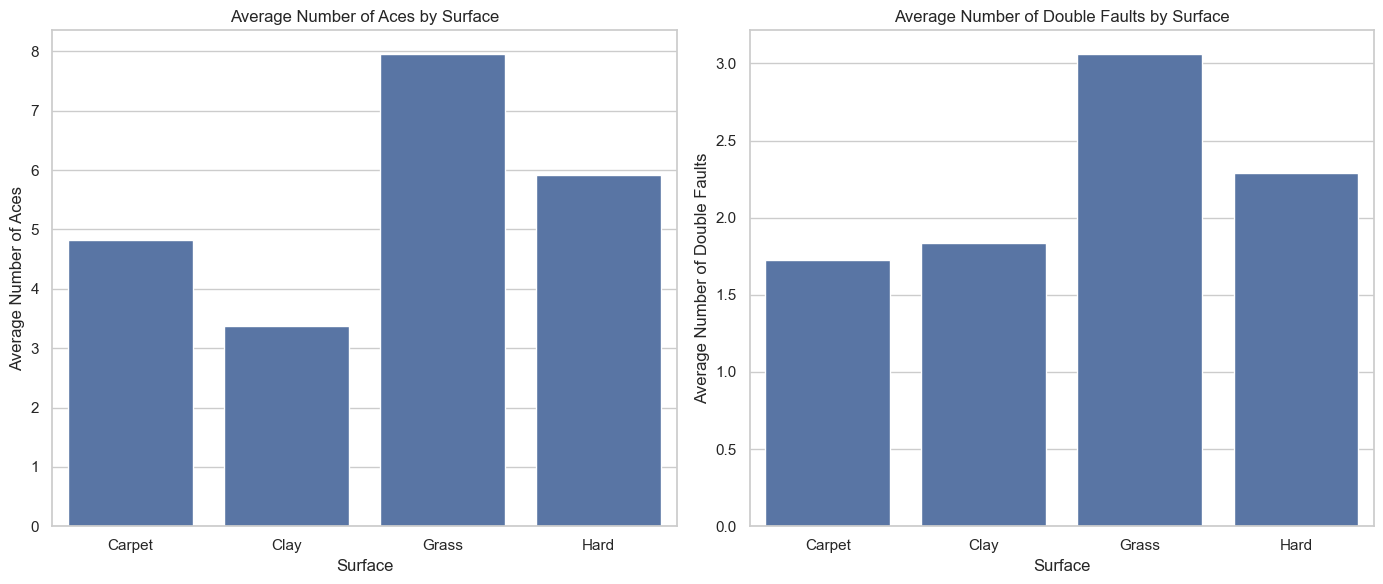

In [10]:
# Grouping the data by surface type and calculating the average number of aces and double faults
surface_stats = cleaned_df.groupby('surface').agg({'w_ace': 'mean', 'w_df': 'mean'}).reset_index()

# Create a mapping dictionary to revert the label encoding for the 'surface' column
surface_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}

# Use this mapping to update the 'surface' column in the 'surface_stats' DataFrame
surface_stats['surface'] = ['Carpet', 'Clay', 'Grass', 'Hard']

# Display the updated 'surface_stats' DataFrame to confirm the changes
surface_stats

# Plotting the average number of aces and double faults by surface
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='surface', y='w_ace', data=surface_stats, ax=ax[0])
ax[0].set_title('Average Number of Aces by Surface')
ax[0].set_xlabel('Surface')
ax[0].set_ylabel('Average Number of Aces')

sns.barplot(x='surface', y='w_df', data=surface_stats, ax=ax[1])
ax[1].set_title('Average Number of Double Faults by Surface')
ax[1].set_xlabel('Surface')
ax[1].set_ylabel('Average Number of Double Faults')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a new column that is 1 if the winner is the higher-ranked player and 0 otherwise
cleaned_df['higher_ranked_wins'] = (cleaned_df['winner_rank'] < cleaned_df['loser_rank']).astype(int)

# Update target variable
new_target = 'higher_ranked_wins'

# Splitting the data into training and test sets again with the new target variable
X_train, X_test, y_train, y_test = train_test_split(X, cleaned_df[new_target], test_size=0.2, random_state=42)

# Standardize the features again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model on the scaled training data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Higher-ranked loses', 'Higher-ranked wins'])

accuracy, classification_rep



(0.998406374501992,
 '                     precision    recall  f1-score   support\n\nHigher-ranked loses       1.00      1.00      1.00      8535\n Higher-ranked wins       1.00      1.00      1.00     15310\n\n           accuracy                           1.00     23845\n          macro avg       1.00      1.00      1.00     23845\n       weighted avg       1.00      1.00      1.00     23845\n')

In [14]:
# Evaluate the model on the test set
y_pred = log_reg.predict(X_test_scaled)

# Get the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8535
           1       1.00      1.00      1.00     15310

    accuracy                           1.00     23845
   macro avg       1.00      1.00      1.00     23845
weighted avg       1.00      1.00      1.00     23845

